In [1]:
import tensorflow as tf
from tensorflow import keras

import matplotlib.pylab as plt


In [2]:
(X_train, Y_train), (X_test, Y_test)=keras.datasets.mnist.load_data()

In [3]:
print(f"We have {len(X_train)} images in the training data set and {len(X_test)} in the testing data set")
print(f"The Size of images {X_train[0].shape}")

We have 60000 images in the training data set and 10000 in the testing data set
The Size of images (28, 28)


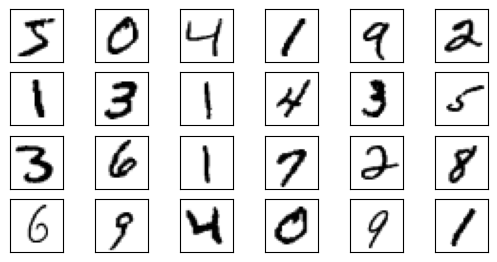

In [4]:
for i in range(24):
    plt.subplot(6,6,i+1) 
    plt.xticks([])
    plt.yticks([])   
    plt.grid(False)
    plt.imshow(X_train[i],cmap=plt.cm.binary)


In [5]:
X_train=X_train.astype("float32")/255.0
Y_test=Y_test.astype("float32")/255.0

In [6]:
for row in X_train[0]:
    for pixel in row:
        print("{:0.3f}".format(pixel),end=" ")
    print("")

0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.012 0.071 0.071 0.071 0.494 0.533 0.686 0.102 0.651 1.000 0.969 0.498 0.000 0.000

In [7]:
from tensorflow.keras import layers

input_layer=tf.keras.layers.Input(shape=(28,28,1))
model=tf.keras.Sequential([
    input_layer,
    layers.Conv2D(filters=10,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=10,kernel_size=(3,3),activation="relu"),
    layers.Conv2D(filters=10,kernel_size=(3,3),activation="relu"),

    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(10,activation="softmax")


])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 10)        100       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 10)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 10)        910       
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 10)          910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 10)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 160)               0

In [9]:
model.compile(optimizer='adam',metrics=['accuracy'],
              loss=tf.keras.losses.SparseCategoricalCrossentropy())

In [10]:
model.fit(X_train,Y_train,epochs=5,batch_size=64,validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 31s 38ms/step - loss: 0.4649 - accuracy: 0.8569 - val_loss: 0.1496 - val_accuracy: 0.9550
Epoch 2/5
750/750 [==============================] - 31s 42ms/step - loss: 0.1345 - accuracy: 0.9584 - val_loss: 0.1005 - val_accuracy: 0.9691
Epoch 3/5
750/750 [==============================] - 31s 41ms/step - loss: 0.1019 - accuracy: 0.9688 - val_loss: 0.0897 - val_accuracy: 0.9737
Epoch 4/5
750/750 [==============================] - 31s 42ms/step - loss: 0.0849 - accuracy: 0.9736 - val_loss: 0.0772 - val_accuracy: 0.9768
Epoch 5/5
750/750 [==============================] - 26s 35ms/step - loss: 0.0753 - accuracy: 0.9768 - val_loss: 0.0654 - val_accuracy: 0.9811


In [11]:
model.save("save model/05.h5")

c:\Users\laptop zone\miniconda3\envs\tensorflow\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
image=X_test[555]
predication=model.predict(image.reshape([1,28,28,1]))
print(predication)

1/1 [==============================] - 0s 142ms/step
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


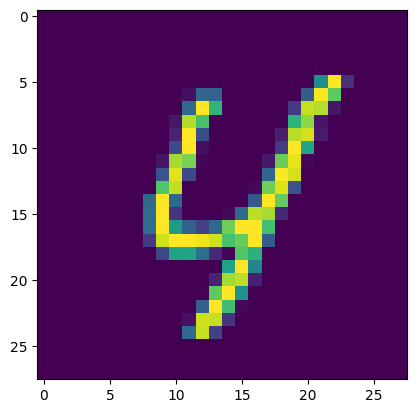

In [26]:
plt.imshow(X_test[555])

In [25]:
predication.argmax()

4